In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_train = pd.read_csv('./data/train_features.csv',sep=',')
df_labels = pd.read_csv('./data/train_labels.csv',sep=',')
df_test = pd.read_csv('./data/dengue_features_test.csv', sep=',')
df_train['total_cases'] = df_labels['total_cases']

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [4]:
print(pd.isnull(df_train).sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [6]:
df_train.fillna(method='ffill', inplace=True)
df_train = df_train.fillna(df_train.mean())

In [7]:
df_train_sj = df_train[df_train['city'] == 'sj']
df_train_iq = df_train[df_train['city'] == 'iq']

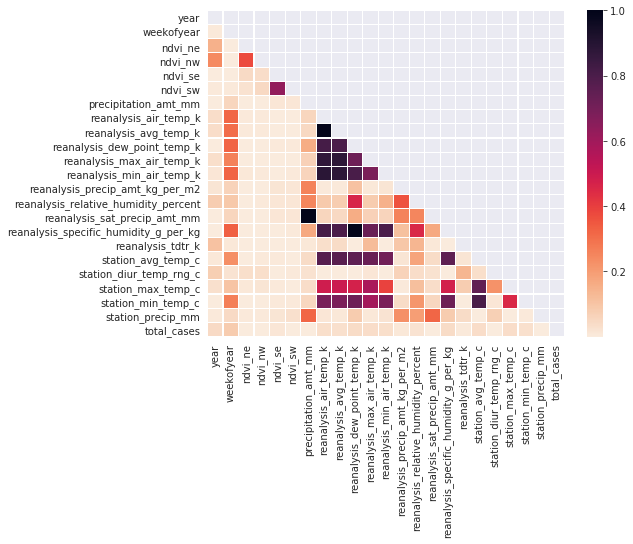

In [9]:
# San Juan
plt.figure(figsize=(8, 6))

corr_sj = df_train_sj.corr()**2
mask_sj = np.zeros_like(corr_sj)
mask_sj[np.triu_indices_from(mask_sj)] = True
with sns.axes_style("dark"):
    sns.heatmap(corr_sj, mask=mask_sj, linewidth=.08, cmap=sns.cm.rocket_r)

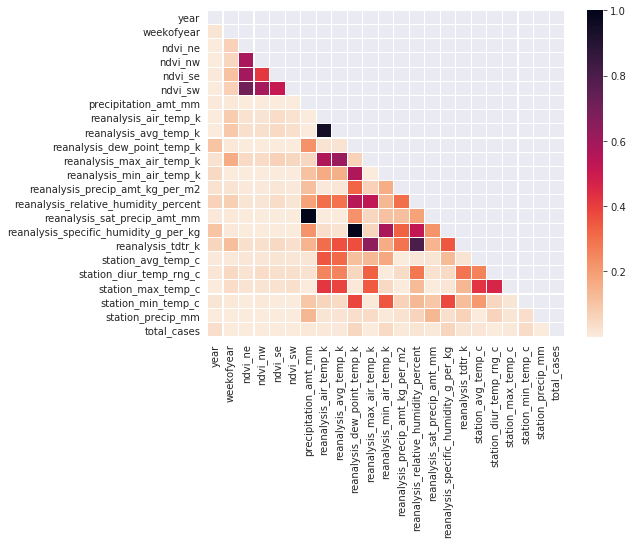

In [10]:
# Iquitos
plt.figure(figsize=(8, 6))

corr_iq = df_train_iq.corr()**2
mask_iq = np.zeros_like(corr_iq)
mask_iq[np.triu_indices_from(mask_iq)] = True

with sns.axes_style("dark"):
    sns.heatmap(corr_iq, mask=mask_iq, linewidth=.08, cmap=sns.cm.rocket_r)

In [15]:
print ("ndvi")
print("Correlation between ndvi_ne and total_cases = " + str(df_train_sj['ndvi_ne'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['ndvi_ne'].corr(df_train_iq['total_cases'])))
print("Correlation between ndvi_nw and total_cases = " + str(df_train_sj['ndvi_nw'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['ndvi_nw'].corr(df_train_iq['total_cases'])))
print("Correlation between ndvi_se and total_cases = " + str(df_train_sj['ndvi_se'].corr(df_train_sj['total_cases']))+ " - " + str(df_train_iq['ndvi_se'].corr(df_train_iq['total_cases'])))
print("Correlation between ndvi_sw and total_cases = " + str(df_train_sj['ndvi_sw'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['ndvi_sw'].corr(df_train_iq['total_cases'])))
print ("\n")


    # precipitation
print ("precipitation")
print("Correlation between precipitation_amt_mm and total_cases = " + str(df_train_sj['precipitation_amt_mm'].corr(df_train_sj['total_cases']))+" - "+ str(df_train_iq['precipitation_amt_mm'].corr(df_train_iq['total_cases'])))
print ("\n")
    
print ("reanalysis")
print("Correlation between reanalysis_air_temp_k and total_cases                 = " + str(df_train_sj['reanalysis_air_temp_k'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_air_temp_k'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_avg_temp_k and total_cases                 = " + str(df_train_sj['reanalysis_avg_temp_k'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_avg_temp_k'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_dew_point_temp_k and total_cases           = " + str(df_train_sj['reanalysis_dew_point_temp_k'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['reanalysis_dew_point_temp_k'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_max_air_temp_k and total_cases             = " + str(df_train_sj['reanalysis_max_air_temp_k'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_max_air_temp_k'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_min_air_temp_k and total_cases             = " + str(df_train_sj['reanalysis_min_air_temp_k'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_min_air_temp_k'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_precip_amt_kg_per_m2 and total_cases       = " + str(df_train_sj['reanalysis_precip_amt_kg_per_m2'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['reanalysis_precip_amt_kg_per_m2'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_relative_humidity_percent and total_cases  = " + str(df_train_sj['reanalysis_relative_humidity_percent'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_relative_humidity_percent'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_sat_precip_amt_mm and total_cases          = " + str(df_train_sj['reanalysis_sat_precip_amt_mm'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_sat_precip_amt_mm'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_specific_humidity_g_per_kg and total_cases = " + str(df_train_sj['reanalysis_specific_humidity_g_per_kg'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_specific_humidity_g_per_kg'].corr(df_train_iq['total_cases'])))
print("Correlation between reanalysis_tdtr_k and total_cases                     = " + str(df_train_sj['reanalysis_tdtr_k'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['reanalysis_tdtr_k'].corr(df_train_iq['total_cases'])))
print("\n")

    # ndvi
print ("station")
print("Correlation between station_avg_temp_c and total_cases      = " + str(df_train_sj['station_avg_temp_c'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['station_avg_temp_c'].corr(df_train_iq['total_cases'])))
print("Correlation between station_diur_temp_rng_c and total_cases = " + str(df_train_sj['station_diur_temp_rng_c'].corr(df_train_sj['total_cases']))+" - " + str(df_train_iq['station_diur_temp_rng_c'].corr(df_train_iq['total_cases'])))
print("Correlation between station_max_temp_c and total_cases      = " + str(df_train_sj['station_max_temp_c'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['station_max_temp_c'].corr(df_train_iq['total_cases'])))
print("Correlation between station_min_temp_c and total_cases      = " + str(df_train_sj['station_min_temp_c'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['station_min_temp_c'].corr(df_train_iq['total_cases'])))
print("Correlation between station_precip_mm and total_cases       = " + str(df_train_sj['station_precip_mm'].corr(df_train_sj['total_cases']))+" - " +str(df_train_iq['station_precip_mm'].corr(df_train_iq['total_cases'])))
print ("\n")

ndvi
Correlation between ndvi_ne and total_cases = 0.004144238286389081 - 0.019739662629656825
Correlation between ndvi_nw and total_cases = 0.059207857052339816 - -0.010519633335991296
Correlation between ndvi_se and total_cases = -0.12002352728990048 - -0.04115344686762154
Correlation between ndvi_sw and total_cases = 0.041054890851796734 - 0.031369318671001456


precipitation
Correlation between precipitation_amt_mm and total_cases = 0.056942494270618954 - 0.08941045113267558


reanalysis
Correlation between reanalysis_air_temp_k and total_cases                 = 0.1794017814775464 - 0.09666581487976969
Correlation between reanalysis_avg_temp_k and total_cases                 = 0.17256852265608782 - 0.0800557848184904
Correlation between reanalysis_dew_point_temp_k and total_cases           = 0.20108565857597152 - 0.2288635076436877
Correlation between reanalysis_max_air_temp_k and total_cases             = 0.1926351222723707 - -0.053157255073872325
Correlation between reanalysis_mi